In [2]:
import pandas as pd

# Lecture du fichier Excel
file_path = "../data/perf_kilo.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name="distance")
    print(df.head())
except Exception as e:
    print(f"Une erreur s'est produite : {e}")


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0


In [3]:
df.describe()

,day,distance(m)
count,1308,1246.000000
mean,2023-04-02 12:00:00,2909.093900
min,2021-06-18 00:00:00,9.000000
25%,2022-05-10 18:00:00,1100.000000
50%,2023-04-02 12:00:00,2300.000000
75%,2024-02-23 06:00:00,4200.000000
max,2025-01-15 00:00:00,15600.000000
std,NaN,2434.651484


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          1308 non-null   datetime64[ns]
 1   distance(m)  1246 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.6 KB


In [5]:
len(df['distance(m)'].isna())

1308

In [6]:
df['distance(m)'].count()

np.int64(1246)

In [7]:
print(df.iloc[1245])

day            2024-11-14 00:00:00
distance(m)                  900.0
Name: 1245, dtype: object


In [8]:
dist = df.iloc[0:1246]
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          1246 non-null   datetime64[ns]
 1   distance(m)  1246 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.6 KB


In [9]:
dist.tail()

,day,distance(m)
1241,2024-11-10,2000.0
1242,2024-11-11,2700.0
1243,2024-11-12,1100.0
1244,2024-11-13,2500.0
1245,2024-11-14,900.0


In [10]:
from utils import data_import

In [11]:
# Appel de la fonction avec un chemin de fichier
file_path = "../data/perf_kilo.xlsx"
data = data_import(file_path)

if data is not None:
    print("Importation réussie !")
else:
    print("Échec de l'importation.")


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0
Importation réussie !


In [12]:
from utils import data_import, removed

# Chemin vers le fichier Excel
file_path = "../data/perf_kilo.xlsx"

# Étape 1 : Importer les données
df = data_import(file_path)

# Étape 2 : Nettoyer les données en supprimant les lignes vides
cleaned_df = removed(df)

# Affichage du résultat final
if cleaned_df is not None:
    print("\nDataFrame nettoyé :")
    print(cleaned_df)


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0
62 ligne(s) vide(s) supprimée(s).




DataFrame nettoyé :
            day  distance(m)
0    2021-06-18        333.0
1    2021-06-19       8400.0
2    2021-06-20       4000.0
3    2021-06-21       4900.0
4    2021-06-22        640.0
...         ...          ...
1241 2024-11-10       2000.0
1242 2024-11-11       2700.0
1243 2024-11-12       1100.0
1244 2024-11-13       2500.0
1245 2024-11-14        900.0

[1246 rows x 2 columns]


In [13]:
from datetime import datetime

def determine_season(day):
    # Définir les intervalles saisonniers
    summer_intervals = [
        (datetime(2021, 6, 18), datetime(2021, 9, 20)),
        (datetime(2022, 6, 21), datetime(2022, 9, 20)),
        (datetime(2023, 6, 21), datetime(2023, 9, 20)),
        (datetime(2024, 6, 21), datetime(2024, 9, 20)),
    ]

    autumn_intervals = [
        (datetime(2021, 9, 21), datetime(2021, 12, 20)),
        (datetime(2022, 9, 21), datetime(2022, 12, 20)),
        (datetime(2023, 9, 21), datetime(2023, 12, 20)),
        (datetime(2024, 9, 21), datetime(2024, 11, 14)),  # Fin limitée à 14/11/2024
    ]

    winter_intervals = [
        (datetime(2021, 12, 21), datetime(2022, 3, 20)),
        (datetime(2022, 12, 21), datetime(2023, 3, 20)),
        (datetime(2023, 12, 21), datetime(2024, 3, 20)),
    ]

    spring_intervals = [
        (datetime(2022, 3, 21), datetime(2022, 6, 20)),
        (datetime(2023, 3, 21), datetime(2023, 6, 20)),
        (datetime(2024, 3, 21), datetime(2024, 6, 20)),
    ]

    # Vérifier dans quelle saison la date se trouve
    for start, end in summer_intervals:
        if start <= day <= end:
            return "Été"
    for start, end in autumn_intervals:
        if start <= day <= end:
            return "Automne"
    for start, end in winter_intervals:
        if start <= day <= end:
            return "Hiver"
    for start, end in spring_intervals:
        if start <= day <= end:
            return "Printemps"

    return "Date hors période spécifiée"


In [17]:
# Appliquer la fonction determine_season à la colonne 'day'
cleaned_df['season'] = cleaned_df['day'].apply(determine_season)

# Afficher le DataFrame avec les saisons
print(cleaned_df)

            day  distance(m)   season
0    2021-06-18        333.0      Été
1    2021-06-19       8400.0      Été
2    2021-06-20       4000.0      Été
3    2021-06-21       4900.0      Été
4    2021-06-22        640.0      Été
...         ...          ...      ...
1241 2024-11-10       2000.0  Automne
1242 2024-11-11       2700.0  Automne
1243 2024-11-12       1100.0  Automne
1244 2024-11-13       2500.0  Automne
1245 2024-11-14        900.0  Automne

[1246 rows x 3 columns]


/tmp/ipykernel_4168/1904297500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['season'] = cleaned_df['day'].apply(determine_season)


In [18]:
cleaned_df.head()

,day,distance(m),season
0,2021-06-18,333.0,Été
1,2021-06-19,8400.0,Été
2,2021-06-20,4000.0,Été
3,2021-06-21,4900.0,Été
4,2021-06-22,640.0,Été


In [19]:
# Renommer la colonne 'distance(m)' en 'distance'
cleaned_df.rename(columns={'distance(m)': 'distance'}, inplace=True)

# Afficher le DataFrame mis à jour
print(cleaned_df)

            day  distance   season
0    2021-06-18     333.0      Été
1    2021-06-19    8400.0      Été
2    2021-06-20    4000.0      Été
3    2021-06-21    4900.0      Été
4    2021-06-22     640.0      Été
...         ...       ...      ...
1241 2024-11-10    2000.0  Automne
1242 2024-11-11    2700.0  Automne
1243 2024-11-12    1100.0  Automne
1244 2024-11-13    2500.0  Automne
1245 2024-11-14     900.0  Automne

[1246 rows x 3 columns]


/tmp/ipykernel_4168/2949933125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.rename(columns={'distance(m)': 'distance'}, inplace=True)


## EDA

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/tmp/ipykernel_4168/1709425778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['year'] = cleaned_df['day'].dt.year


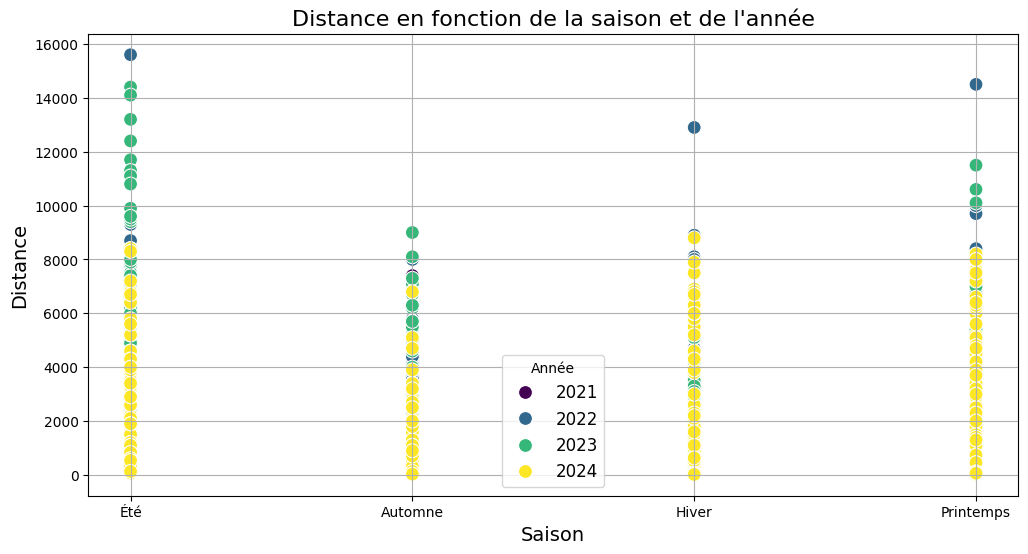

In [25]:
# Extraire l'année de la colonne 'day'
cleaned_df['year'] = cleaned_df['day'].dt.year

# Visualisation des données
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison et de l\'année', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Année 2021

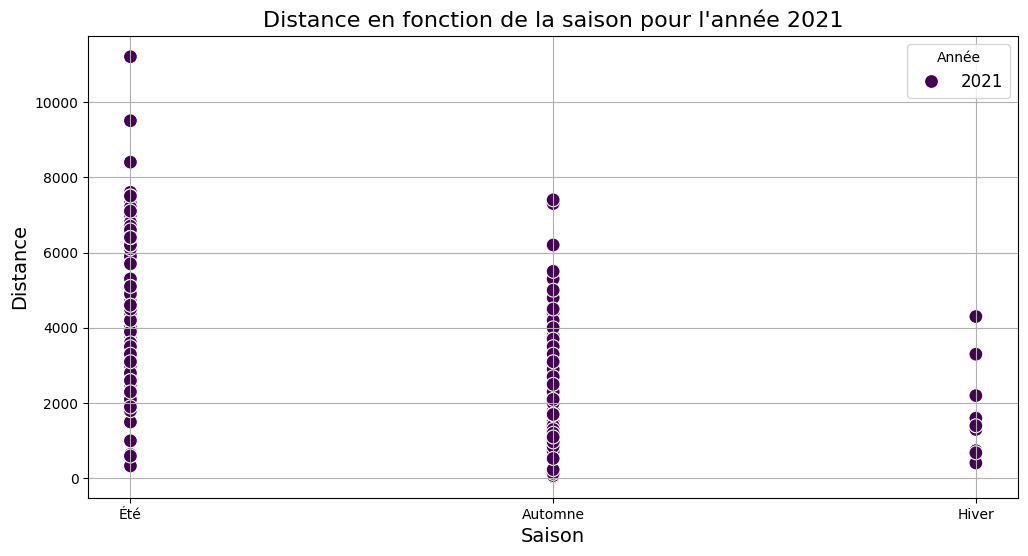

In [ ]:
# Filtrer les données pour l'année 2021
cleaned_df_2021 = cleaned_df[cleaned_df['year'] == 2021]

# Visualisation des données pour 2021
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2021, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2021', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Année 2022

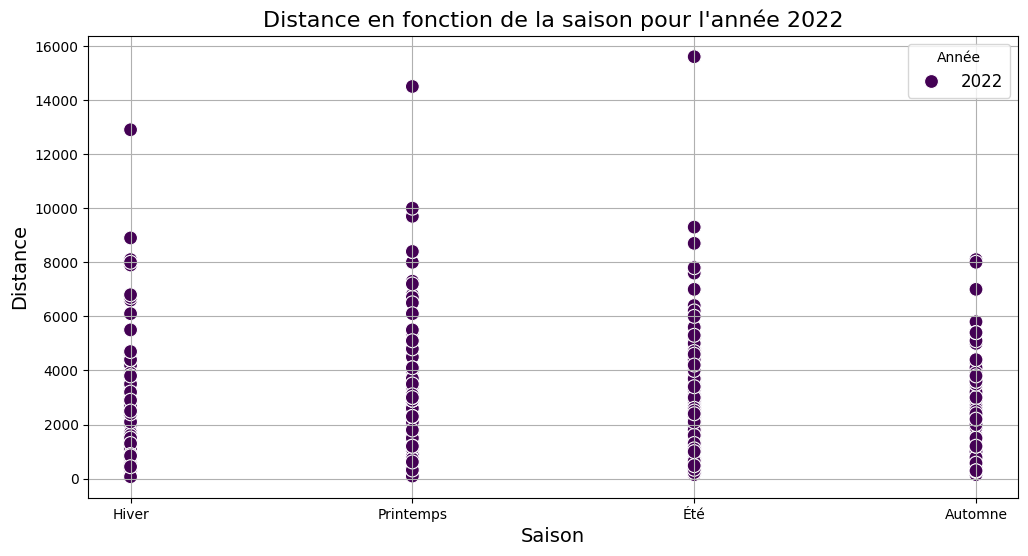

In [27]:
# Filtrer les données pour l'année 2022
cleaned_df_2022 = cleaned_df[cleaned_df['year'] == 2022]

# Visualisation des données pour 2022
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2022, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2022', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

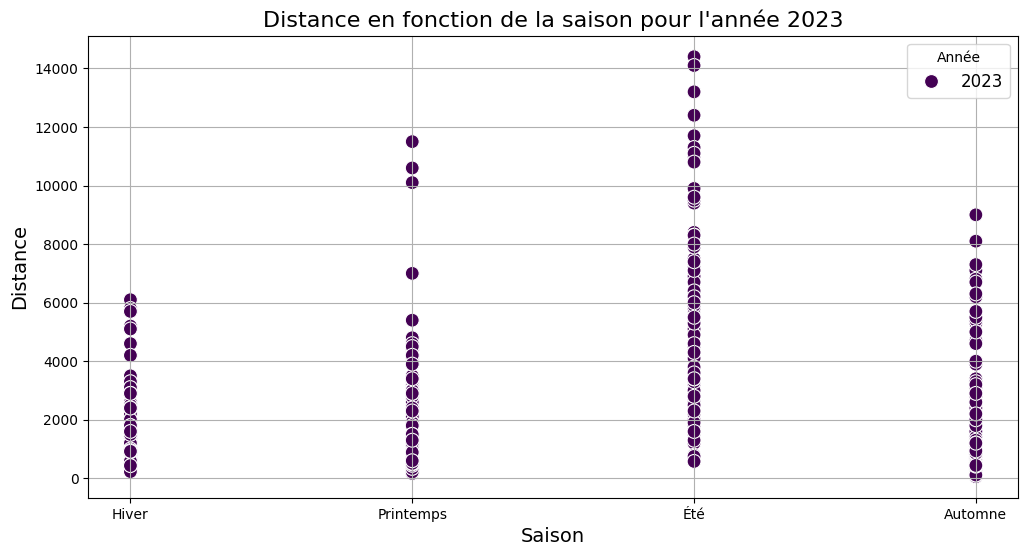

In [28]:
# Filtrer les données pour l'année 2023
cleaned_df_2023 = cleaned_df[cleaned_df['year'] == 2023]

# Visualisation des données pour 2023
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2023, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2023', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

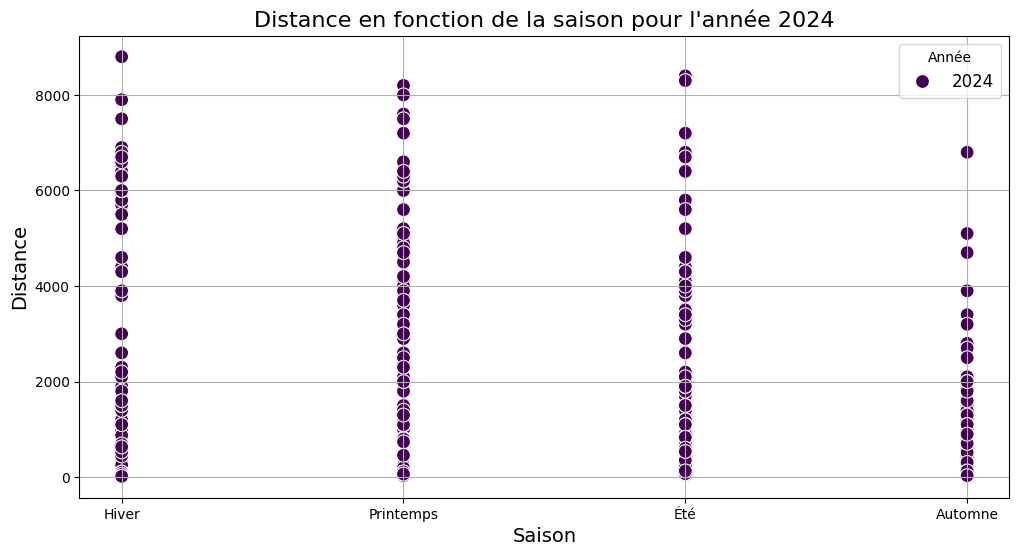

In [32]:
# Filtrer les données pour l'année 2024
cleaned_df_2024 = cleaned_df[cleaned_df['year'] == 2024]

# Visualisation des données pour 2024
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2024, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2024', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Comparaison des distances entre la même saison au cours de toute la période

/tmp/ipykernel_4168/1303061390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['winter'] = cleaned_df['day'].apply(assign_winter)
/tmp/ipykernel_4168/1303061390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_winter, x='winter', y='distance', palette='cool')


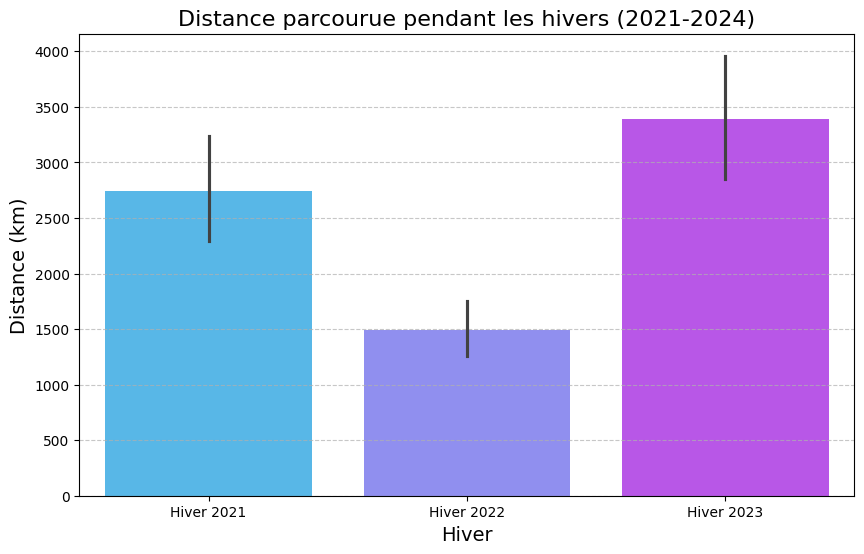

In [31]:
# Filtrer les données pour les hivers 2021-2024
winter_periods = {
    'Hiver 2021': (datetime(2021, 12, 21), datetime(2022, 3, 20)),
    'Hiver 2022': (datetime(2022, 12, 21), datetime(2023, 3, 20)),
    'Hiver 2023': (datetime(2023, 12, 21), datetime(2024, 3, 20)),
    'Hiver 2024': (datetime(2024, 12, 21), datetime(2025, 3, 20))
}

# Ajouter une colonne pour l'hiver correspondant
def assign_winter(day):
    for winter, (start, end) in winter_periods.items():
        if start <= day <= end:
            return winter
    return None

cleaned_df['winter'] = cleaned_df['day'].apply(assign_winter)

# Filtrer uniquement les données des hivers
df_winter = cleaned_df.dropna(subset=['winter'])

# Visualiser les distances parcourues pendant chaque hiver
plt.figure(figsize=(10, 6))
sns.barplot(data=df_winter, x='winter', y='distance', palette='cool')

# Ajouter des détails au graphique
plt.title('Distance parcourue pendant les hivers (2021-2024)', fontsize=16)
plt.xlabel('Hiver', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()